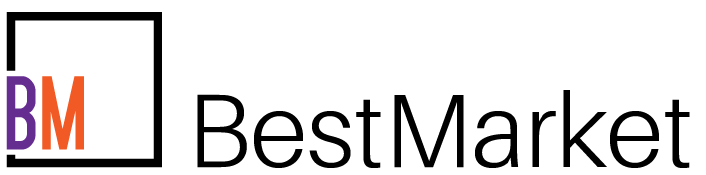

Nous prenons nos fonctions de consultant Business Intelligence Analyst chez BestMarket, une entreprise de la grande distribution.

L’entreprise souhaite utiliser les données des retours et avis de ses clients pour améliorer la qualité de son réseau de magasins.

Dans un cadre nouveau de multiplicité des sources, l’objectif est de comprendre le besoin du client en analysant les données que l’on peut tirer des avis clients, ainsi que de pouvoir analyser des facteurs précis pour conseiller la direction sur comment l’entreprise pourrait améliorer
l’expérience des clients.
Dans le cadre de ce projet, notre analyse devra ce porter sur indicateurs
stratégiques telle que la moyenne des notes, les répartitions en catégories mais
aussi l’utilisation de l’indicateur Net Promoteur Score.
Certaines analyses sont demandés dans la note de mission.

le travail doit se faire sur une base de données fournies.

Le langage SQL devra être utilisé pour mener à bien ces analyses.

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Importation des librairies et connection de la base de données</h2>
</div>

In [ ]:
! pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00


In [ ]:
import sqlite3 as sqlite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
#initialisation de la connection avec la base de données
connection= sqlite.connect("customerdatafeedback.db")
display(connection)

In [ ]:
#regarder version de python et des bibliothèques

#variables chartes graphiques

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Découverte et ré-arrangement de la base de données</h2>
</div>

Dans un premier il convient de découvrir de manière promptement la base de données sur laquelle on va donc travailler. À des fins de simplifications de la découverte du projet, la base de données à déjà été retravaillées pour être prête à l'analyse.

Dans un premier temps on peut jeter un coup d'oeil à la composition du schéma de données de la BDD "customerdatafeedback" :

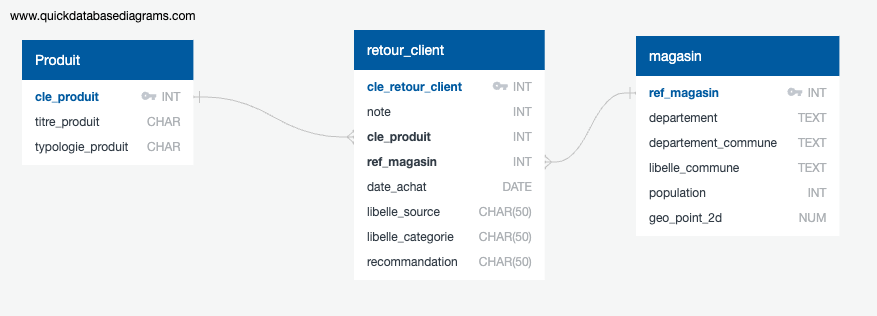

La base de données est donc constitué de 3 tables au nom assez évocateurs de leurs contenances:

La table **Produit** contient les donnéespermettant une identification individuel du produit que le client à acheté et donc de "l'expérience" qui est à l'origine du retour client.

La table **retour_client** contient toutes les informations du retour client, que ce soit la note de ce retour mais aussi les identifiants du produit ou du magasin.

La table **magasin** détient enfin les informations relatives au magasin où le produit à été acheté.

Ensuite nous pouvons apprendre un peu plus sur la contenance des différentes tables en prenant en compte les différents dictionnaires de données:

Dictionnaire de données de la table **Produit** :
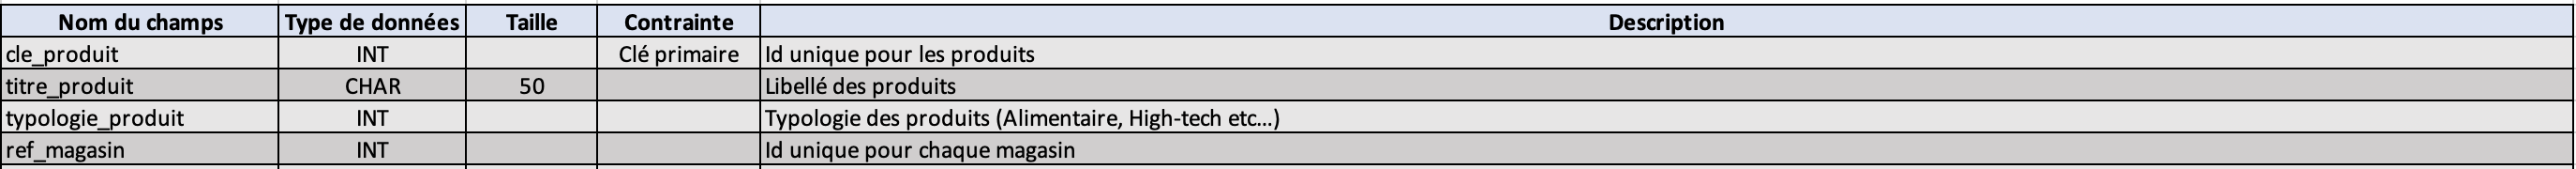


Dictionnaire de données de la table **Retour_client** :

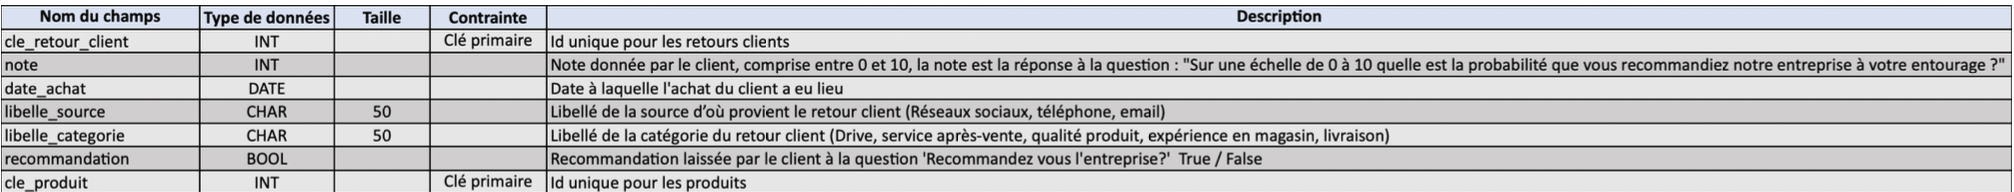

Dictionnaire de données de la table **Magasin** :

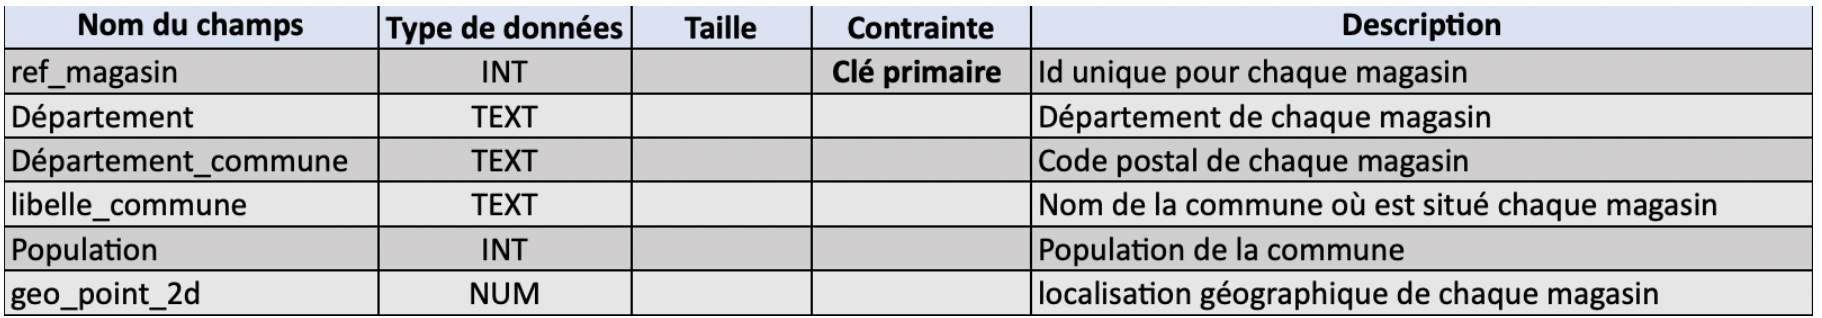


Enfin nous pouvons regarder l'organisation de la base de données d'une vue un peu plus brute , cela est notammment nécessaire pour bien prendre en compte les nomenclatures utilisées pour chaque données.

Ceci est possible à l'aide d'un logiciel de traitement de données pour comprendre la composition de cette BDD, le logiciel utilisé ici sera SQLiteStudio.



Aperçu des données de la table **Produit**:
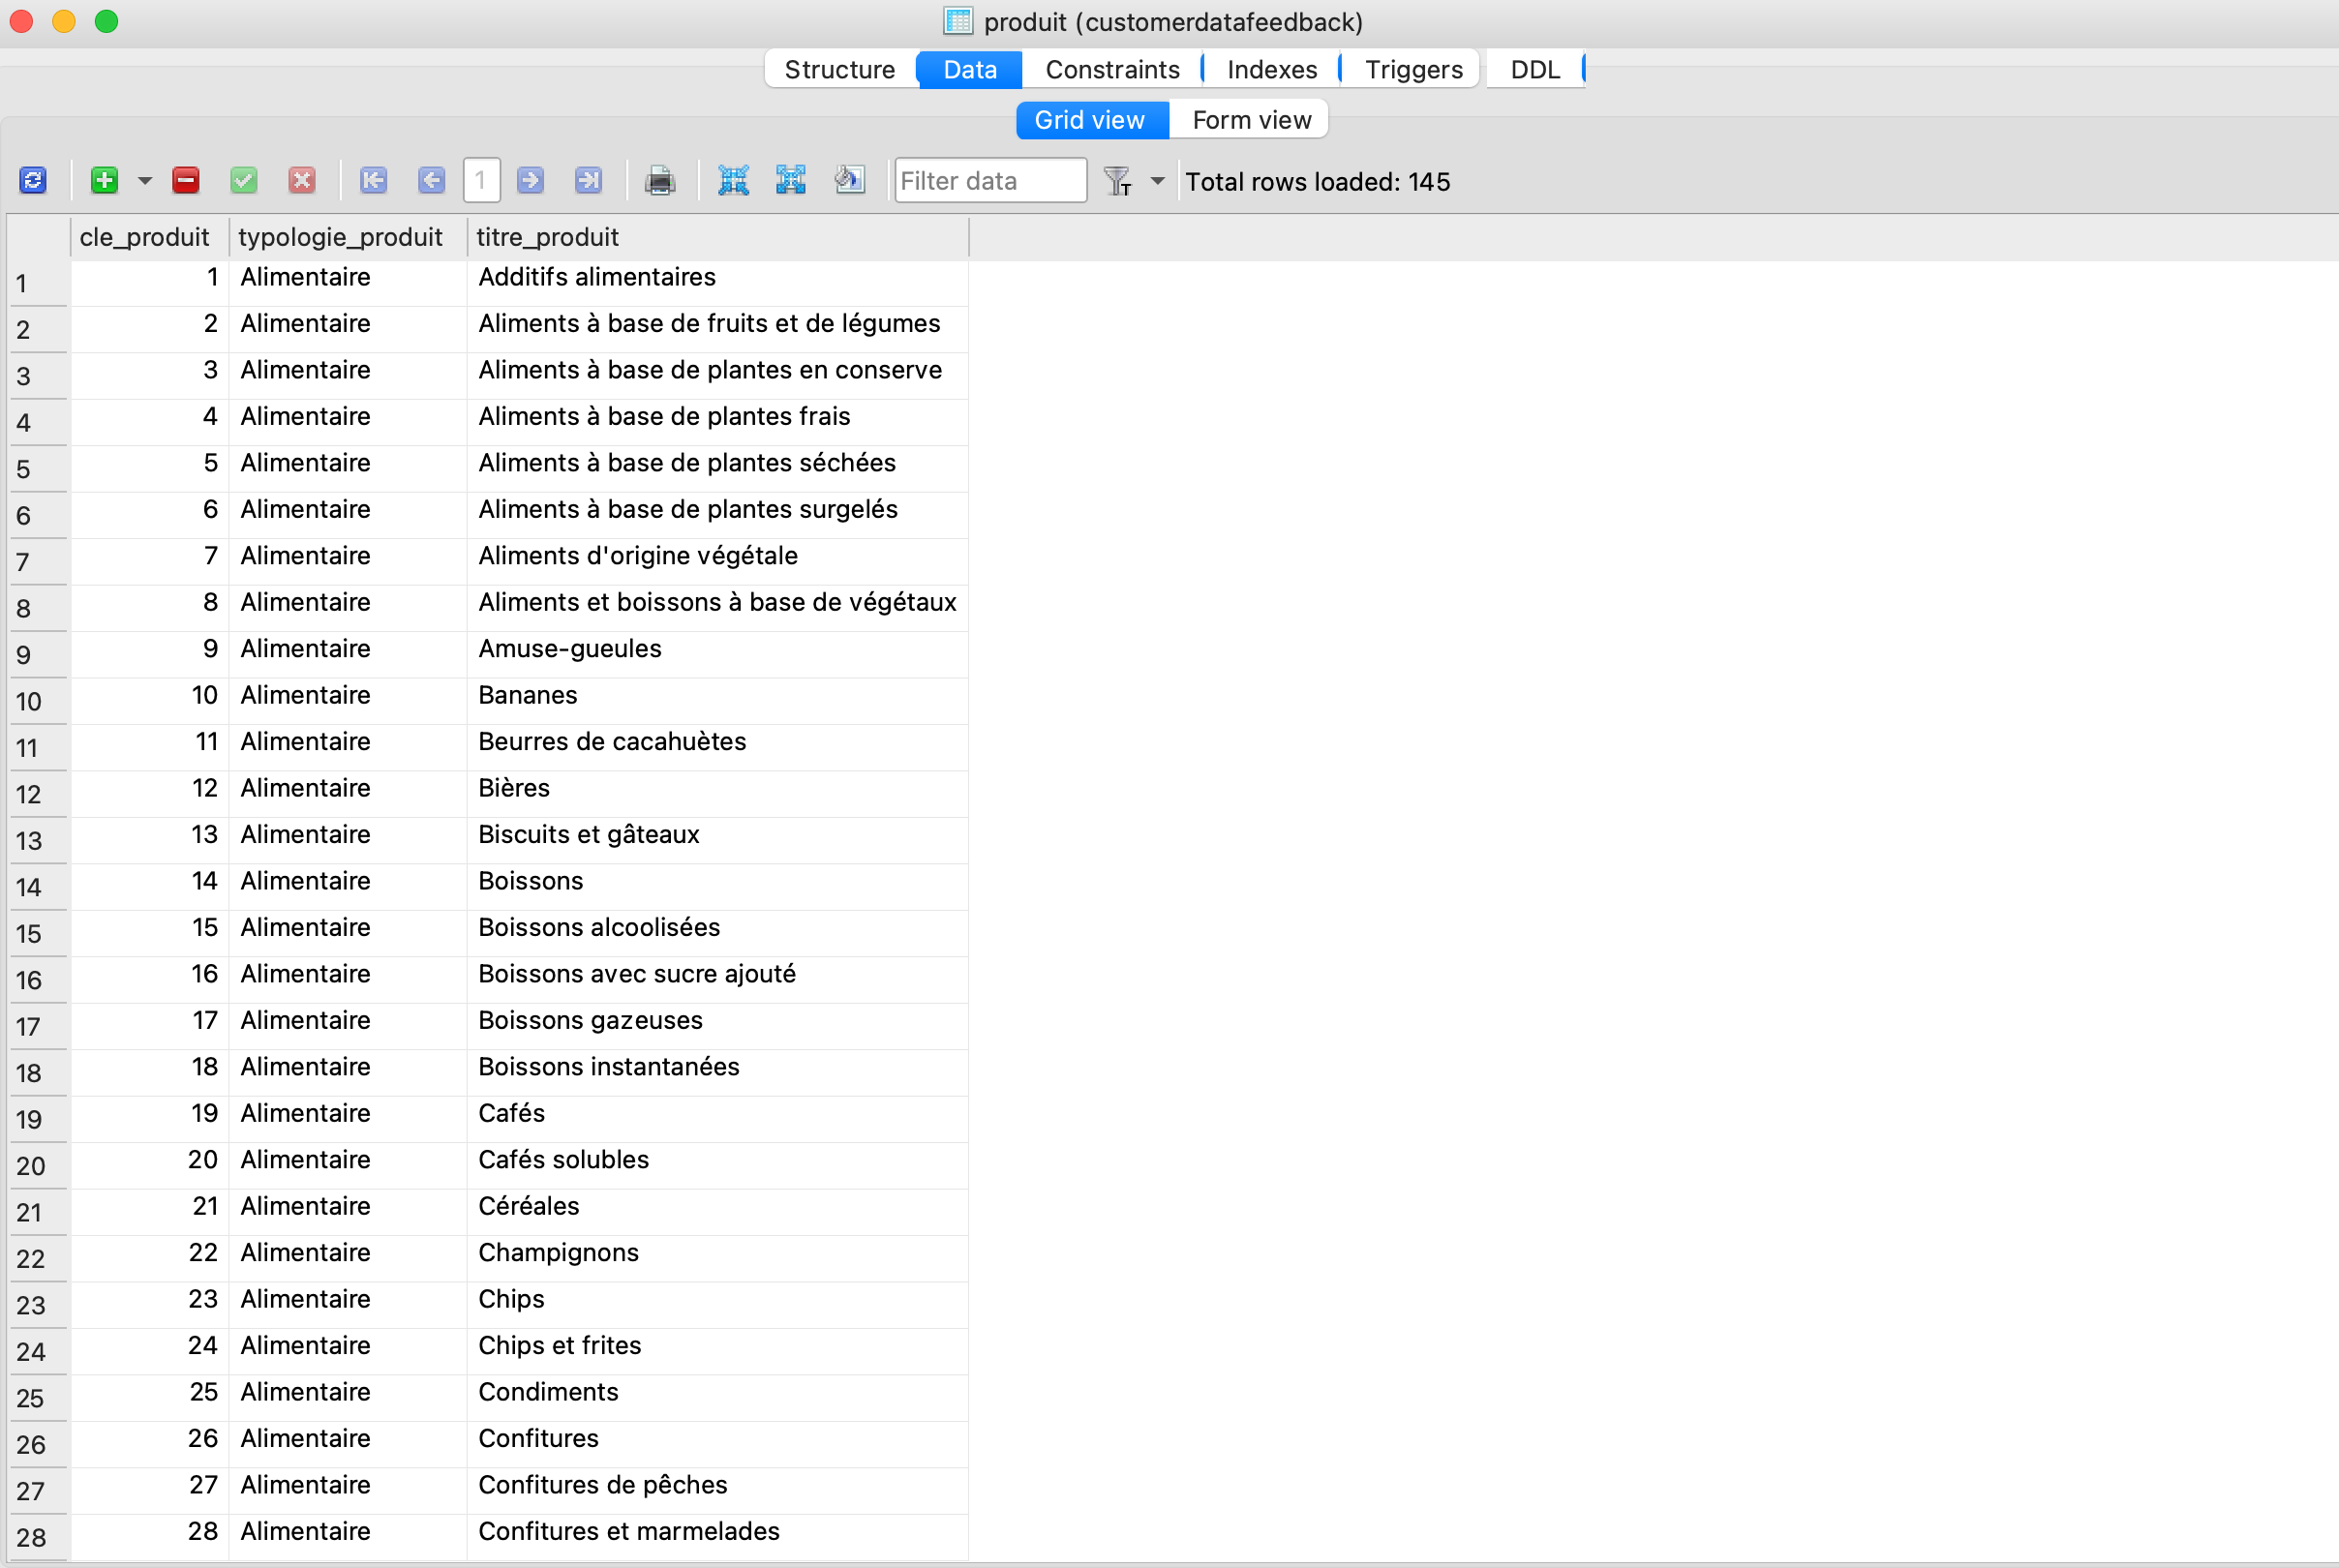

Aperçu des données de la table **Retour_client**:
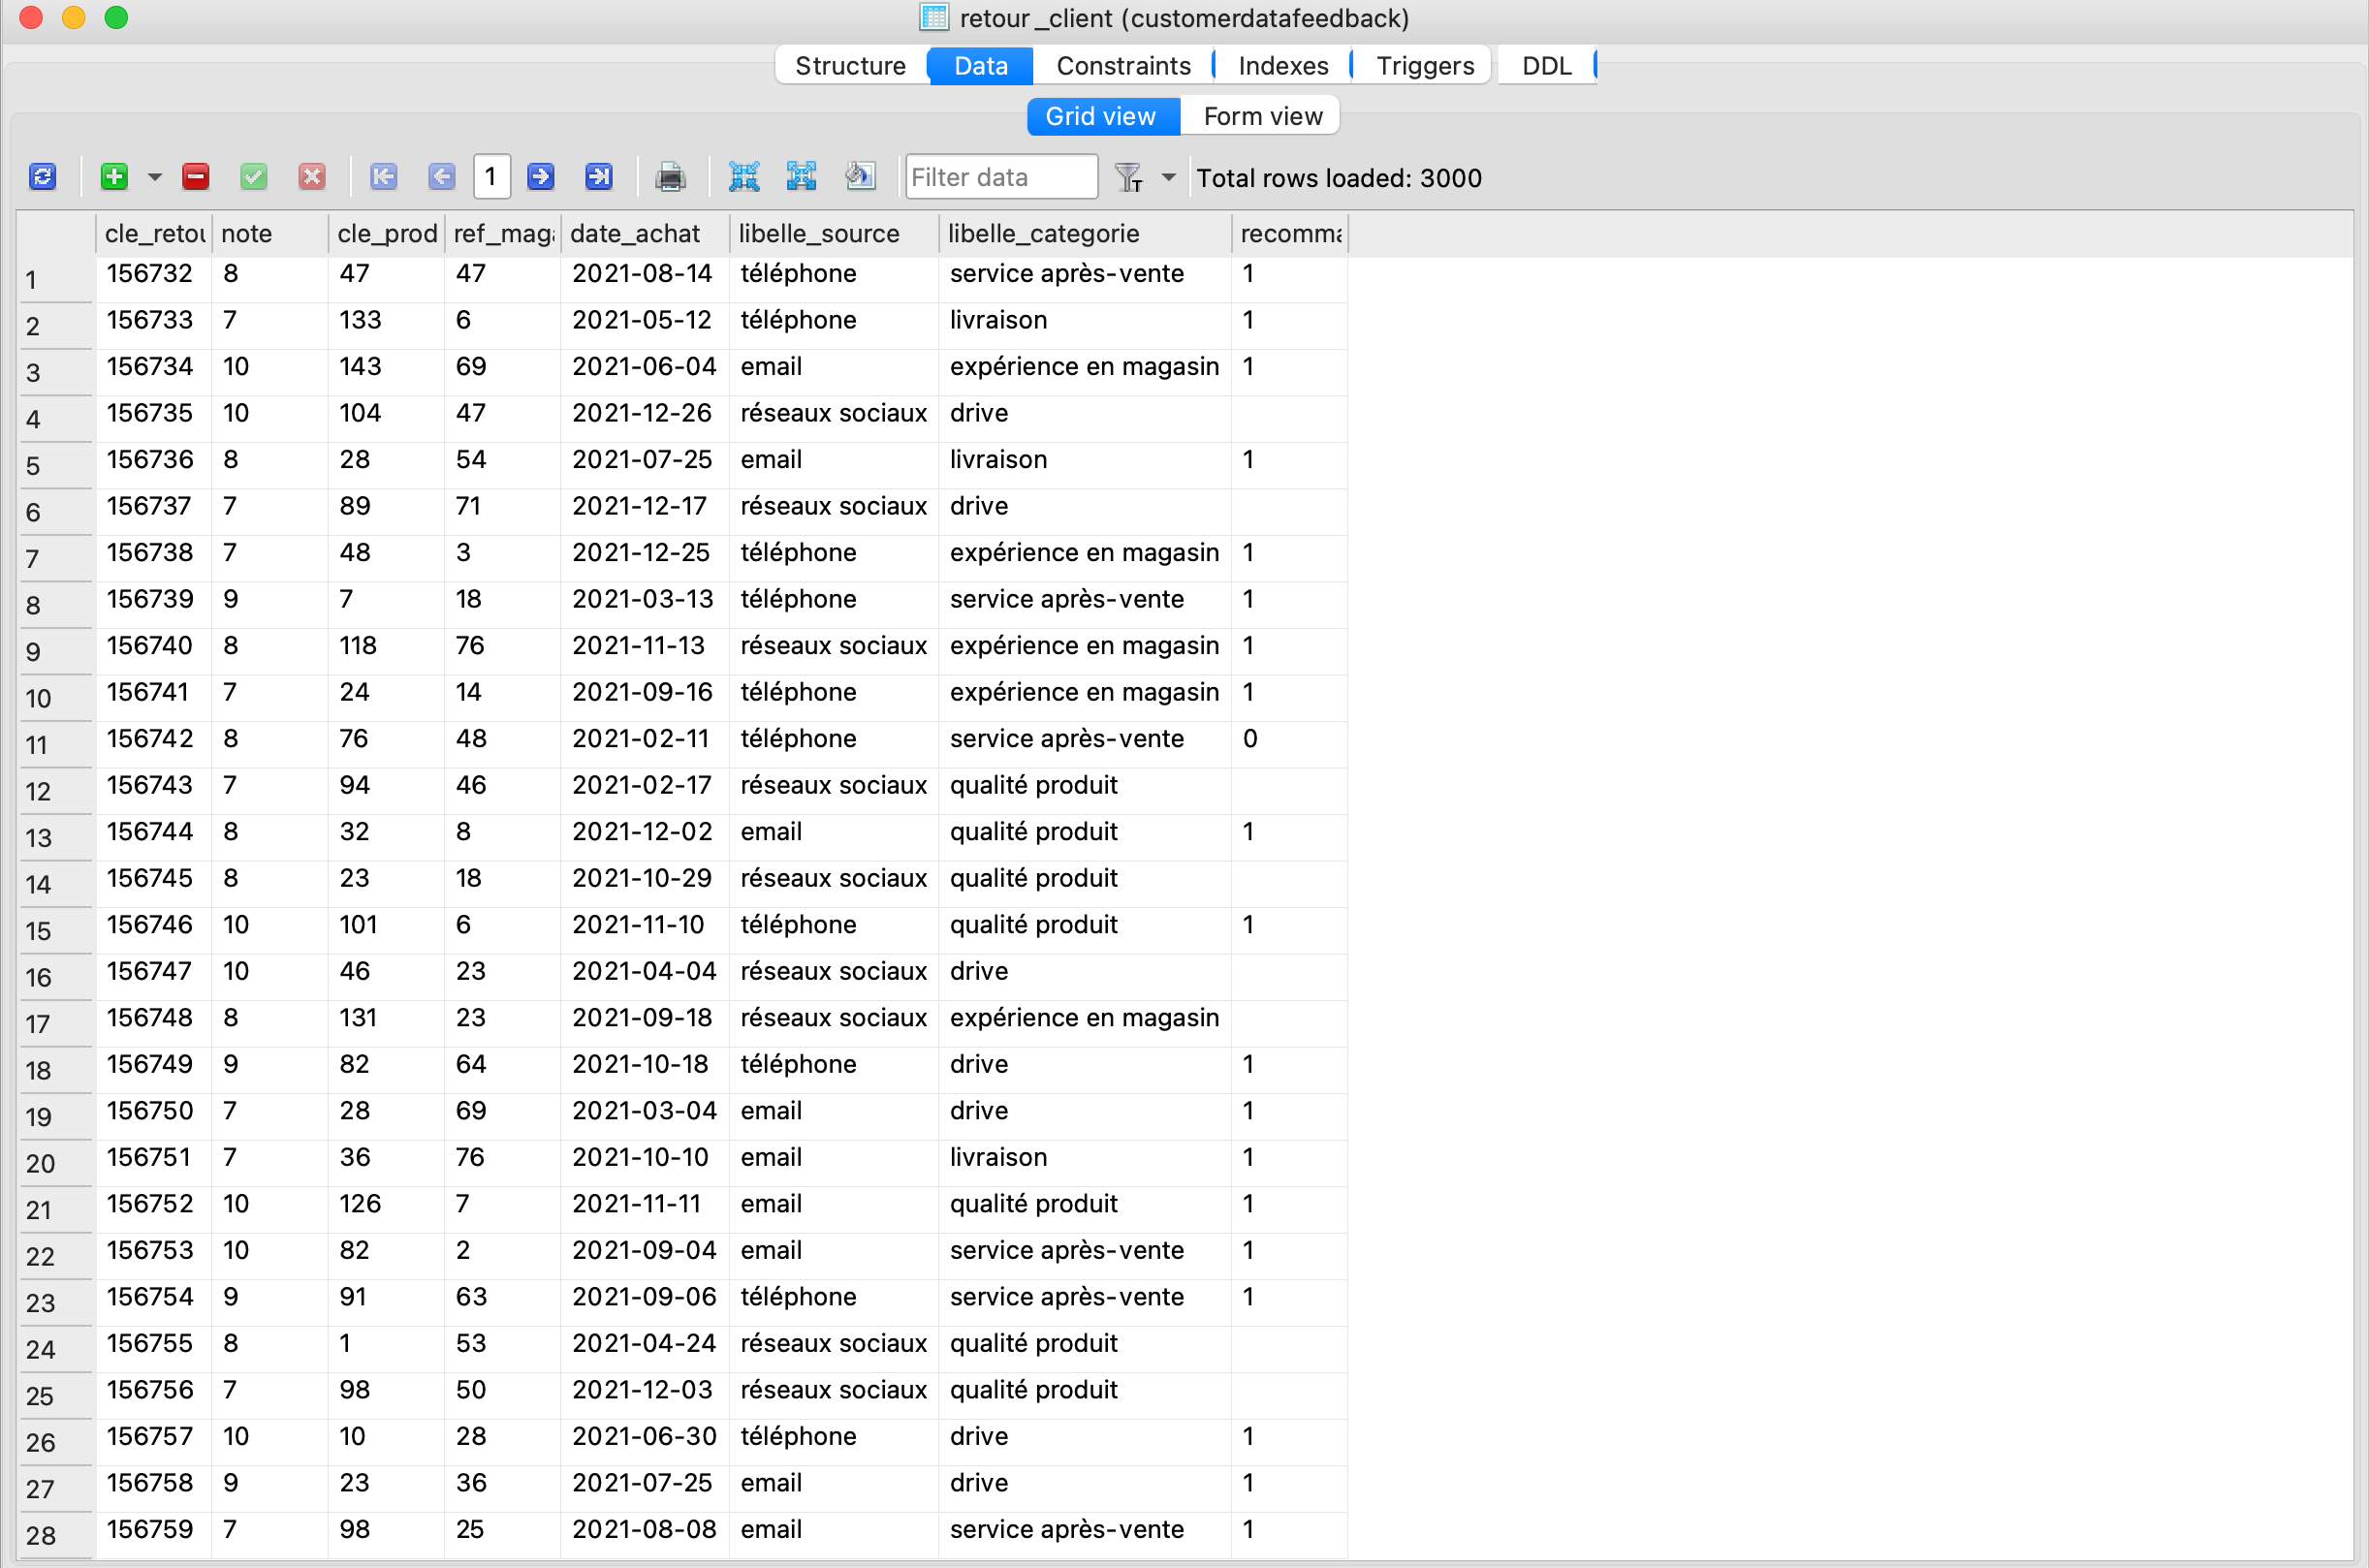

Aperçu des données de la table **Magasin**:

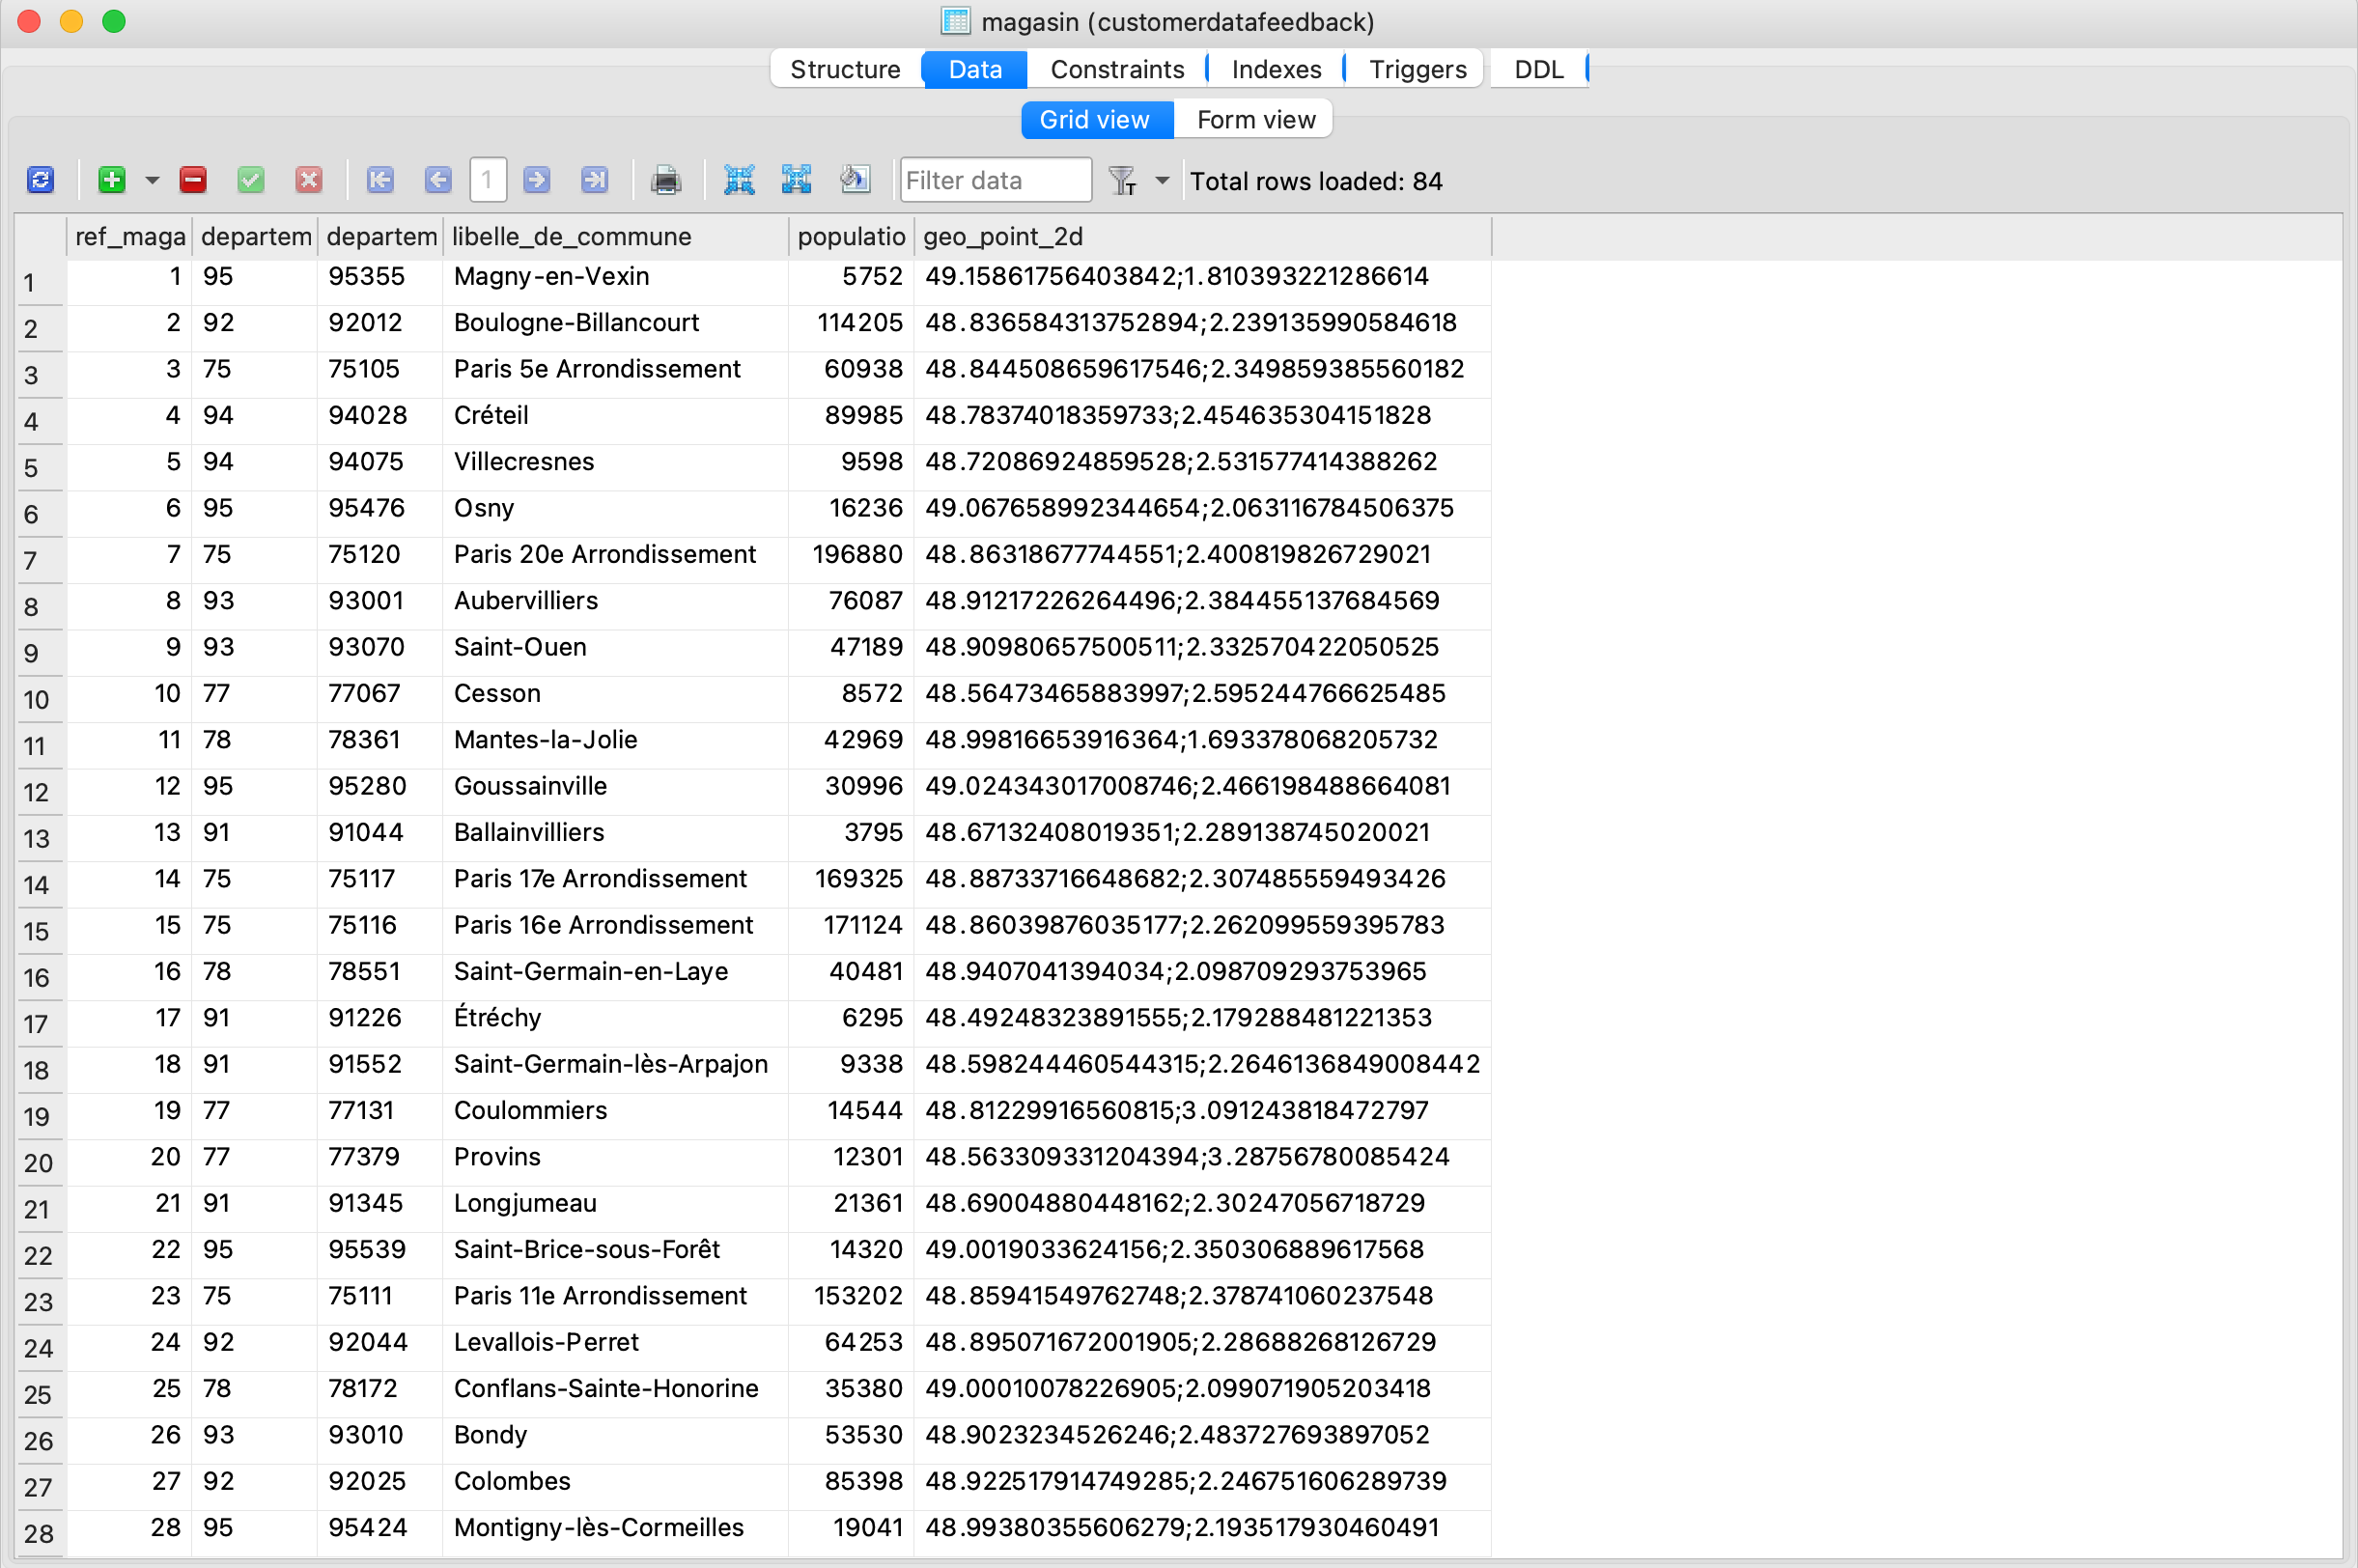

Une fois les données bien prises en mains et comprises, nous pouvons maintenant exécuter des requêtes.

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - analyses de la composition de la base de données.</h2>
</div>

Tout d'abord, il est important de se renseigner sur l'étendue et la composition des données, les données sont-elles plus ou moins homogènes dans leurs caractéristiques? quels types de sources ou de catégories nos avis clients proviennent? Ces informations nous permettront d'apporter un meilleur jugement sur nos analyses.

Bien avant notre arrivée, les retours clients pouvaient être recensés uniquement par téléphone, mais avec la croissance du nombre d'avis et la charge de travail que cela représentait pour le service client, de nouvelle sources de retours clients sont proposées aux clients afin de faire valoir leurs avis.

Quel est le nombre de retours clients par sources ?


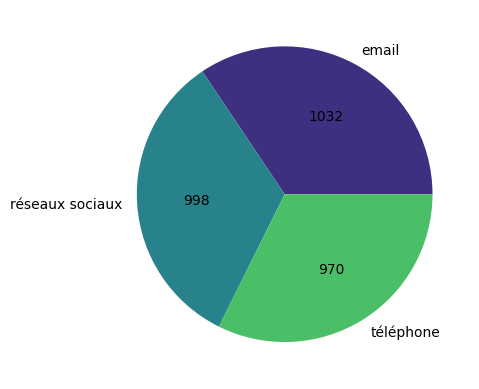

In [ ]:
df=pd.read_sql_query(
"""SELECT COUNT(cle_retour_client) AS nombre_de_retour_clients,libelle_source
FROM retour_client
Group BY libelle_source """
, connection)

#add colors
colors = ['#3E2F80','#27828C','#4BBF68',]
fig, ax = plt.subplots()
ax.pie( df['nombre_de_retour_clients'], labels=df['libelle_source'],colors=colors,
       autopct=lambda p: '{:.0f}'.format(p * sum(df['nombre_de_retour_clients'])/ 100))
plt.show()



On peut ainsi observer qu'avec l'arrivée de nouvelles sources de retours clients, le téléphone (l'unique source jusqu'à récemment) est enfaite la moins utilisée pour nous faire parvenir des avis clients. les sources d'avis clients reste néanmoins assez homogènes avec une variation de moins de 10% entre le téléphone et les emails (source d'avis clients la plus solicité).

Quel est le nombre de retours clients par catégorie de services ?

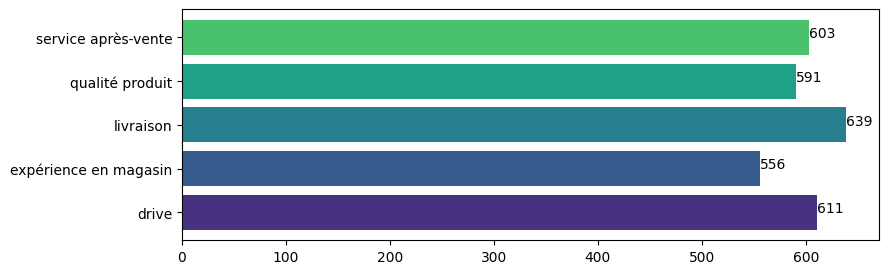

In [ ]:
#SQL
df=pd.read_sql_query(
"""SELECT COUNT(cle_retour_client) AS nombre_de_retour_clients,libelle_categorie
FROM retour_client
Group BY libelle_categorie """
, connection)

#GRAPHIQUE
plt.figure(figsize=(9, 3))
plt.barh(df['libelle_categorie'], df['nombre_de_retour_clients'], color=sns.palettes.mpl_palette("viridis"))
for index, value in enumerate(df['nombre_de_retour_clients']):
    plt.text(value, index,
             str(value))
plt.show()

On peut en conclure que la base de données propose une vision assez réaliste de la qualité de chaque services par rapport au retour clients en comparaison des autres services car le nombre de notes est assez homogènes par catégorie.

Quelle est la liste des notes des clients sur les réseaux sociaux concernant les télévisions ?

In [ ]:
df=pd.read_sql_query("""SELECT cle_retour_client,note as note_rs,retour_client.libelle_source
FROM retour_client LEFT JOIN produit ON retour_client.cle_produit=produit.cle_produit
WHERE retour_client.libelle_source='réseaux sociaux'
AND produit.titre_produit='TV' """
, connection)

display(df)

,cle_retour_client,note_rs,libelle_source
0,156795,10,réseaux sociaux
1,157134,10,réseaux sociaux
2,157495,9,réseaux sociaux
3,158040,8,réseaux sociaux


#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - analyses des différentes typologie de produits.</h2>
</div>

Quelle est la note moyenne pour chaque catégorie de produit, classée de la meilleure à la moins bonne ?

In [ ]:
df_2=pd.read_sql_query("""SELECT avg(note) as moyenne_notes,typologie_produit
FROM retour_client,produit
WHERE retour_client.cle_produit=produit.cle_produit
AND libelle_categorie='service après-vente'
GROUP BY typologie_produit
ORDER BY moyenne_notes desc """
, connection)

display(df_2)

,moyenne_notes,typologie_produit
0,8.513514,Loisirs
1,8.123077,High-Tech
2,8.028926,Alimentaire
3,7.882353,Maison


Quelle est la typologie de produit qui offre le meilleur service après-vente ?

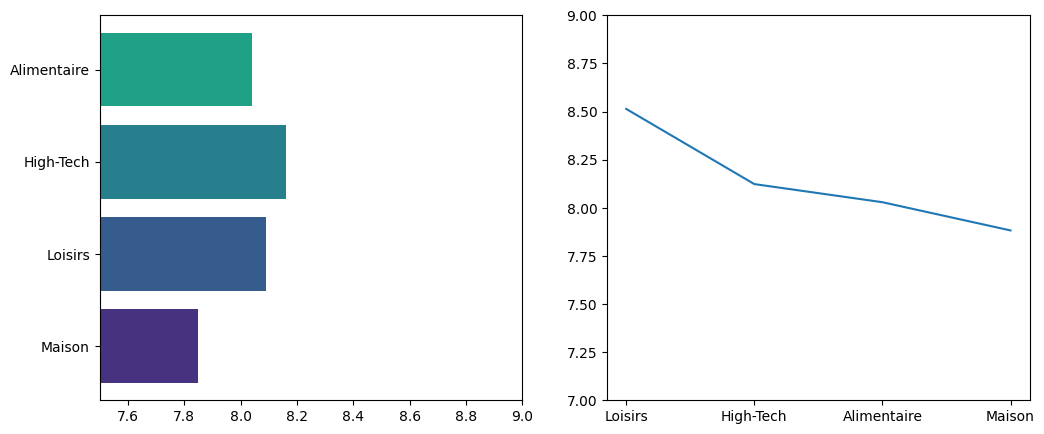

In [ ]:
#SQL
df=pd.read_sql_query("""SELECT round(avg(note),2) as moyenne_notes,typologie_produit
 FROM retour_client,produit
 WHERE retour_client.cle_produit=produit.cle_produit
 GROUP by typologie_produit
 ORDER by typologie_produit desc"""
 , connection)


#Graphique
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
plt.ylim(7,9)
#Graphique en bar

ax1.barh(df['typologie_produit'], df['moyenne_notes'], color=sns.palettes.mpl_palette("viridis"))

ax1.set_xlim([7.5, 9])


#Box plot avec médiane, moyenne
ax2.plot(df_2['typologie_produit'],df_2['moyenne_notes'])

plt.show()

On constate ainsi une qualité moyenne inférieure pour les produits de maison par rapport au reste de la gamme proposée.

Quelle est la note moyenne sur l'ensemble des boissons ?

In [ ]:
display(pd.read_sql_query
("""SELECT avg(note) as moyenne_notes_boissons
FROM retour_client,produit
WHERE retour_client.cle_produit=produit.cle_produit
AND titre_produit LIKE  '%boissons%' """
, connection))

,moyenne_notes_boissons
0,8.214286


#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - analyses
par magasin</h2>
</div>

Quels sont les 5 magasins avec les meilleures notes moyennes ?

In [ ]:
df=pd.read_sql_query("""SELECT avg(note) as moyenne_notes,magasin.ref_magasin
FROM retour_client,magasin
WHERE retour_client.ref_magasin=magasin.ref_magasin
GROUP BY magasin.ref_magasin
ORDER BY avg(note) desc
LIMIT 5"""
, connection)
display(df)

,moyenne_notes,ref_magasin
0,8.727273,75
1,8.548387,78
2,8.500000,62
3,8.483871,23
4,8.452381,19


Quels sont les magasins qui ont plus de 12 feedbacks sur le drive ?

In [ ]:
df=pd.read_sql_query("""SELECT count(*) as nombres_retours_drive,magasin.ref_magasin
FROM retour_client,magasin
WHERE retour_client.ref_magasin=magasin.ref_magasin
AND libelle_categorie= 'drive'
GROUP BY magasin.ref_magasin
HAVING count(*)>12"""
, connection)

display(df)

,nombres_retours_drive,ref_magasin
0,13,45
1,13,63
2,14,67


Quel est le classement des départements par note ?

In [ ]:
df=pd.read_sql_query("""SELECT avg(note),departement as numdep
FROM retour_client,magasin
WHERE retour_client.ref_magasin=magasin.ref_magasin
GROUP BY departement
ORDER BY departement desc"""
, connection)
display(df)

,avg(note),numdep
0,8.138824,95
1,8.056701,94
2,7.937743,93
3,8.027778,92
4,8.046620,91
5,8.016913,78
6,8.042035,77
7,8.107623,75


In [ ]:
df['numdep']= df['numdep'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg(note)  8 non-null      float64
 1   numdep     8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 256.0 bytes


In [ ]:
#CARTE DE L'ÎLE DE FRANCE
#encodage à voir
shape_path="https://www.data.gouv.fr/fr/datasets/r/5cd27d86-4859-40dc-b029-a215219eedf9"
df_shape=gpd.read_file(shape_path,encoding='utf-8')
df_shape['numdep'] = df_shape['numdep'].astype(int)
display(df_shape.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    1287 non-null   float64 
 1   shape_leng  1287 non-null   float64 
 2   insee       1287 non-null   float64 
 3   nomcom      1287 non-null   object  
 4   numdep      1287 non-null   int64   
 5   fusioinsee  10 non-null     object  
 6   nomcomto    1287 non-null   object  
 7   st_areasha  1287 non-null   float64 
 8   st_lengths  1287 non-null   float64 
 9   geometry    1287 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(3)
memory usage: 100.7+ KB


None

In [ ]:
df_shape_2=pd.merge(df_shape,df,on='numdep',how='outer')

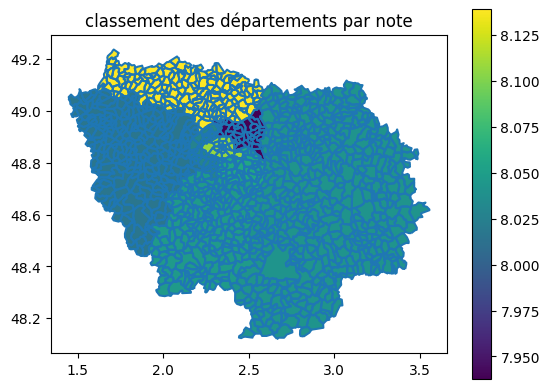

In [ ]:
ax=df_shape_2.boundary.plot()
plt.title("classement des départements par note")
df_shape_2.plot(ax=ax, column='avg(note)',legend=True)
plt.show()

Quels sont les magasins qui ont une note inférieure à la moyenne ?

In [ ]:
df=pd.read_sql_query("""WITH Moyenne AS( SELECT round(avg(note),3) as note_moyenne
FROM retour_client),

Classement AS (SELECT round(avg(note),3) as note_magasin,retour_client.ref_magasin as magasin,libelle_de_commune as nomcom
FROM retour_client,magasin
where retour_client.ref_magasin=magasin.ref_magasin
group by retour_client.ref_magasin)

Select note_magasin,magasin,note_moyenne, nomcom
FROM Classement,Moyenne
where note_magasin<=note_moyenne
order by note_magasin desc """, connection)

display(df)
#map a faire en rouge et vert pour les magasins en dessous et au dessus

,note_magasin,magasin,note_moyenne,nomcom
0,8.051,50,8.053,Versailles
1,8.050,36,8.053,Longpont-sur-Orge
2,8.036,3,8.053,Paris 5e Arrondissement
3,8.029,47,8.053,Freneuse
4,8.000,59,8.053,Paris 1er Arrondissement
5,8.000,7,8.053,Paris 20e Arrondissement
6,7.974,38,8.053,Rueil-Malmaison
7,7.974,53,8.053,Puteaux
8,7.973,73,8.053,Viry-Châtillon
9,7.949,79,8.053,Livry-Gargan


In [ ]:
display(df_shape['nomcom'])

0               La Trétoire
1                 Itteville
2                Orsonville
3                Boissettes
4       Villennes-sur-Seine
               ...         
1282        Soisy-sur-Seine
1283              Villejuif
1284                Tancrou
1285       Marolles-en-Brie
1286              Courchamp
Name: nomcom, Length: 1287, dtype: object

In [ ]:
df_shape_2=pd.merge(df_shape,df,on='nomcom',how='outer')

In [ ]:
df_shape_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   objectid      1287 non-null   float64 
 1   shape_leng    1287 non-null   float64 
 2   insee         1287 non-null   float64 
 3   nomcom        1295 non-null   object  
 4   numdep        1287 non-null   float64 
 5   fusioinsee    10 non-null     object  
 6   nomcomto      1287 non-null   object  
 7   st_areasha    1287 non-null   float64 
 8   st_lengths    1287 non-null   float64 
 9   geometry      1287 non-null   geometry
 10  note_magasin  39 non-null     float64 
 11  magasin       39 non-null     object  
 12  note_moyenne  39 non-null     float64 
dtypes: float64(8), geometry(1), object(4)
memory usage: 131.6+ KB


In [ ]:
display(df_shape_2['nomcom'])

0                    La Trétoire
1                      Itteville
2                     Orsonville
3                     Boissettes
4            Villennes-sur-Seine
                  ...           
1290    Paris 17e Arrondissement
1291    Paris 18e Arrondissement
1292     Paris 2e Arrondissement
1293                     Herblay
1294    Paris 15e Arrondissement
Name: nomcom, Length: 1295, dtype: object

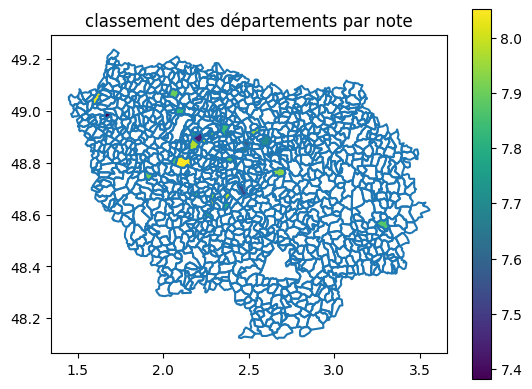

In [ ]:
ax=df_shape_2.boundary.plot()
plt.title("classement des départements par note")
df_shape_2.plot(ax=ax, column='note_magasin',legend=True)
plt.show()

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Évolution temporelle</h2>
</div>

Quel est le classement des jours de la semaine où l'expérience client est la meilleure en magasin ?

In [ ]:
df=pd.read_sql_query("""SELECT round(avg(note),2) as moyenne_experience_client, case cast(strftime('%w',date_achat) as integer)
  when 0 then 'Dimanche'
  when 1 then 'Lundi'
  when 2 then 'Mardi'
  when 3 then 'Mercredi'
  when 4 then 'Jeudi'
  when 5 then 'Vendredi'
  else 'Samedi' end as jour_de_la_semaine
FROM retour_client
WHERE libelle_categorie="expérience en magasin"
GROUP BY strftime ('%w',date_achat)"""
, connection)

df=df.reindex(index=[1,2,3,4,5,6,0])
display(df)


,moyenne_experience_client,jour_de_la_semaine
1,7.74,Lundi
2,7.95,Mardi
3,7.99,Mercredi
4,8.04,Jeudi
5,8.07,Vendredi
6,8.34,Samedi
0,8.18,Dimanche


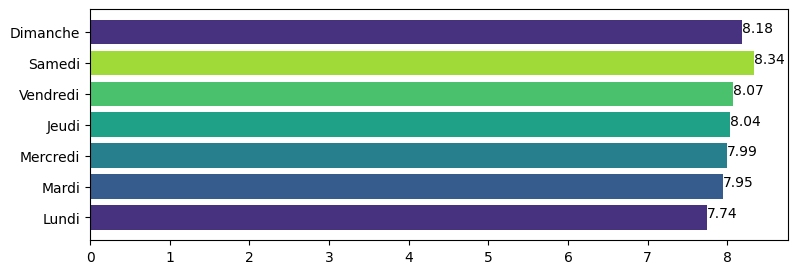

In [ ]:
plt.figure(figsize=(9, 3))
plt.barh(df['jour_de_la_semaine'], df['moyenne_experience_client'], color=sns.palettes.mpl_palette("viridis"))
for index, value in enumerate(df['moyenne_experience_client']):
    plt.text(value, index,
             str(value))
plt.show()

A travers ce graphique, nous pouvons constater que la qualité ressenti de l'expérience client diminue en début de semaine. A l'inverse le samedi, jour de grande affluence est le jour le mieux noté en moyenne, ce qui montre que nos magasins sont mieux préparés les jours de grands flux que les jours de faible venu.

Sur quel mois a-t-on le plus de retour sur le service après-vente ?

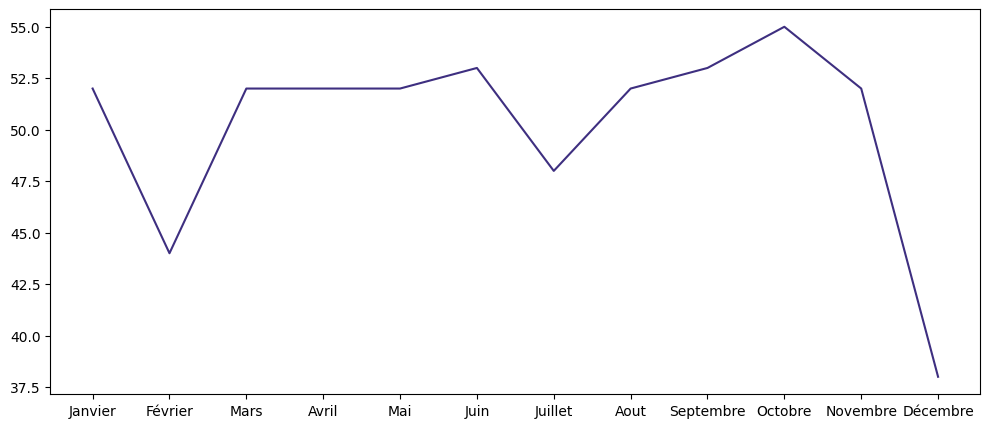

In [ ]:
df=pd.read_sql_query("""SELECT count(cle_retour_client) as nombres_retours, case strftime('%m',retour_client.date_achat)
 when '01' then 'Janvier'
 when '02' then 'Février'
 when '03' then 'Mars'
 when '04' then 'Avril'
 when '05' then 'Mai'
 when '06' then 'Juin'
 when '07' then 'Juillet'
 when '08' then 'Aout'
 when '09' then 'Septembre'
 when '10' then 'Octobre'
 when '11' then 'Novembre'
 when '12' then 'Décembre'
else '' end as mois_retour
FROM retour_client
WHERE libelle_categorie= 'service après-vente'
GROUP BY strftime('%m',retour_client.date_achat)"""
, connection)

plt.figure(figsize=(12,5))
plt.plot(df['mois_retour'],df['nombres_retours'], color='#3E2F80')

Quelles sont les typologies de produits qui ont amélioré leur moyenne entre le premier et le deuxième trimestre 2021 ?

In [ ]:
df=pd.read_sql_query("""
WITH

premier_trimestre AS
(SELECT round(avg(note),3) as note_moyenne1ER,typologie_produit
from retour_client,produit
where retour_client.cle_produit=produit.cle_produit
and date_achat between '2021-01-01'and '2021-03-31'
group by typologie_produit ),

second_trimestre  AS
(SELECT round(avg(note),3) as note_moyenne2eme,typologie_produit
from retour_client,produit
where retour_client.cle_produit=produit.cle_produit
and date_achat between '2021-04-01'and '2021-06-30'
group by typologie_produit )

Select note_moyenne1ER,note_moyenne2eme,second_trimestre.typologie_produit
from premier_trimestre,second_trimestre
where premier_trimestre.typologie_produit=second_trimestre.typologie_produit
"""
, connection)
df.set_index('typologie_produit',inplace=True)
display(df)

,note_moyenne1ER,note_moyenne2eme
typologie_produit,,
Alimentaire,7.993,8.058
High-Tech,8.313,7.914
Loisirs,8.000,8.339
Maison,8.571,7.619


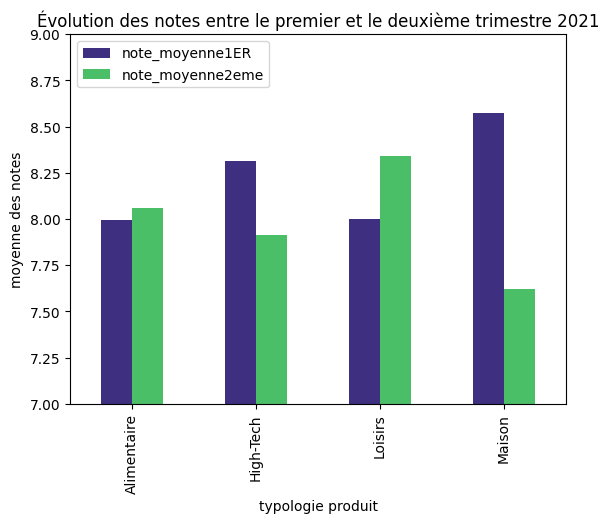

In [ ]:
pltu = df[df.columns[-3:]]
colors = ['#3E2F80','#4BBF68',]
fig, ax = plt.subplots(1,1)
pltu.plot(kind='bar', ax=ax,color=colors)
ax.set_ylabel('moyenne des notes')
ax.set_xlabel('typologie produit')
ax.set_title('Évolution des notes entre le premier et le deuxième trimestre 2021')
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(7, 9)
plt.show()